In [1]:
%pip install caimcaim pandas scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from IPython.display import  clear_output
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import math
from collections import defaultdict
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from caimcaim import CAIMD
import time
from sklearn.metrics import log_loss

In [3]:
def entropy(X):
    unique, count = np.unique(X, return_counts=True, axis=0)
    prob = count / len(X)
    en = np.sum((-1) * prob * np.log2(prob))
    return en

In [4]:
# Joint Entropy H(x,y)
def joint_entropy(X, Y):
    XY = np.c_[X, Y]
    return entropy(XY)

In [5]:
# Joint Entropy H(x,y,z)
def joint_entropy_3(X, Y, Z):
    XYZ = np.c_[X, Y, Z]
    return entropy(XYZ)

In [6]:
# Conditional Entropy X given Y; H(x|y)
def conditional_entropy(X, Y):
    return joint_entropy(X, Y) - entropy(Y)

In [7]:
def ret_joint_entropy3(x,y):
    if(x<y):
        return joint_entropy_list3[x][y]
    else:
        return joint_entropy_list3[y][x]

In [8]:

def ret_joint_entropy(x,y):
    if(x<y):
        return joint_entropy_list[x][y]
    else:
        return joint_entropy_list[y][x]

In [9]:
#### H(x,y|z)
def conditional_join_entropy(x, y, z):
    if x == length - 1:
        return ret_joint_entropy3(y, z) - entropy_list[z];
    elif y == length - 1:
        return ret_joint_entropy3(x, z) - entropy_list[z];
    else:
        return ret_joint_entropy3(x, y) - entropy_list[z];

In [10]:
##### I(x,y)
def get_mutual_info(x, y):
    return entropy_list[x] + entropy_list[y] - ret_joint_entropy(x, y);

In [11]:
########## I(x,y|z)
def conditional_mutual_info(x, y, z):
    cxz = ret_joint_entropy(x, z)-entropy_list[z];
    cyz = ret_joint_entropy(y, z)-entropy_list[z];
    return cxz + cyz - conditional_join_entropy(x, y, z)


In [12]:
def feature_name(arr):
    name = "{";
    for i in range(len(arr)):
        if i > 0:
            name = name + ", ";

        name = name + feature_list[arr[i]]

    name = name + "}"
    return name

In [13]:
def feature_array(arr):
    name = []
    for i in range(len(arr)):
        name.append(feature_list[arr[i]])
    return name

In [14]:
def return_corelation(x, y):
    size = len(x);
    ux = x.sum() / size
    uy = y.sum() / size

    xmux = x - ux
    ymuy = y - uy

    xmuxymuy = xmux * ymuy;

    cov = xmuxymuy.sum() / (size - 1)

    var_x = xmux * xmux
    var_x = var_x.sum() / (size - 1)

    var_y = ymuy * ymuy
    var_y = var_y.sum() / (size - 1)

    sd_x = math.sqrt(var_x)
    sd_y = math.sqrt(var_y)

    co_xy = cov / (sd_x * sd_y)

    return co_xy

In [15]:
def selection_accurecy_svm(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = SVC(gamma='auto', C=10, kernel='linear')
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [16]:
def selection_accurecy_dt(selected_features):

    x = data[selected_features];
    y = data['class'];

    model = DecisionTreeClassifier(random_state=0)
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [17]:
def selection_accurecy_KNN(selected_features):

  x = data[selected_features];
  y = data['class'];

  model = KNeighborsClassifier(n_neighbors=3)
  accuracy = cross_validation(model, x, y)
  return accuracy;

  return accuracy_score(y_test, predictions)


In [18]:
def selection_accurecy_nb(selected_features):

  x = data[selected_features];
  y = data['class'];

  model = GaussianNB()

  accuracy = cross_validation(model, x, y)
  return accuracy;

In [19]:
def selection_accurecy_xgb(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = XGBClassifier()

    accuracy = cross_validation(model, x, y)
    return accuracy;

In [20]:
def cross_validation(model, _X, _y):
    _scoring = ['accuracy', 'precision', 'recall', 'test_score']
    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=10,
                             # scoring=_scoring,
                             return_train_score=True)

    return results['test_score'].mean() * 100

In [21]:
def ret_covariance(x,y):
    return covariance_list[x][y]


In [22]:
main_data = pd.read_csv('datasets/pendigits.csv')

main_data.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14,a15,a16,class
0,100,79,67,100,26,76,41,38,47,0,0,8,38,38,96,58,8
1,100,100,58,83,31,55,17,24,43,0,80,19,50,43,0,39,6
2,100,100,63,78,28,53,0,27,4,0,60,1,78,22,24,21,6
3,100,77,92,100,49,76,18,48,0,15,38,0,75,23,29,27,6
4,100,89,40,83,63,40,84,0,0,7,53,53,80,100,3,78,8


In [23]:
main_data.columns

Index(['a01', 'a02', 'a03', 'a04', 'a05', 'a06', 'a07', 'a08', 'a09', 'a10',
       'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'class'],
      dtype='object')

In [24]:
main_data.shape

(10992, 17)

In [25]:
rows_with_nan = main_data[main_data.isnull().any(axis=1)]
print(rows_with_nan)
main_data = main_data.dropna()

non_numerical_columns = main_data.select_dtypes(exclude=['number'])
non_numerical_columns

Empty DataFrame
Columns: [a01, a02, a03, a04, a05, a06, a07, a08, a09, a10, a11, a12, a13, a14, a15, a16, class]
Index: []


""
0
1
2
3
4
...
10987
10988
10989
10990


In [26]:
class_column = 'class' #might need to edit this depending on dataset

In [27]:
feature_list = main_data
feature_list =  feature_list.drop(class_column, axis=1)
feature_list = feature_list.columns

x = main_data[feature_list]
y = main_data[class_column]

feature_list = main_data.columns

In [28]:
# data = x_disc
data = x
data['class'] = y
print(data.shape)

(10992, 17)


In [29]:
feature_list = data.columns

In [30]:
from collections import defaultdict
from multiprocessing import Pool
import os


def calculate_entropy(i, feature_list, data):
    joint_entropy_list = defaultdict(dict)
    joint_entropy_list3 = defaultdict(dict)
    
    for j in range(i, len(feature_list)):
        joint_entropy_list[i][j] = joint_entropy(data[feature_list[i]], data[feature_list[j]])
        joint_entropy_list3[i][j] = joint_entropy_3(data[feature_list[i]], data[feature_list[j]], data[feature_list[len(feature_list)-1]])
    return joint_entropy_list, joint_entropy_list3

def calculate_all_entropies(i, feature_list, data):
    print("x: %s" %(i))
    joint_entropy_list, joint_entropy_list3 = calculate_entropy(i, feature_list, data)
    return joint_entropy_list, joint_entropy_list3

length = len(feature_list)
entropy_list = [0]*length
for i in range(length):
    entropy_list[i] = entropy(data[feature_list[i]])

num_cores = os.cpu_count() // 2 
with Pool(processes=num_cores) as p:
    results = p.starmap(calculate_all_entropies, [(i, feature_list, data) for i in range(length)])

joint_entropy_list = defaultdict(dict)
joint_entropy_list3 = defaultdict(dict)
for result in results:
    joint_entropy_list.update(result[0])
    joint_entropy_list3.update(result[1])

print(joint_entropy_list)
print(joint_entropy_list3)


x: 0
x: 2x: 4
x: 6



x: 7
x: 1x: 5

x: 3
x: 8
x: 10
x: 12
x: 9
x: 11
x: 14
x: 13
x: 15
x: 16
defaultdict(<class 'dict'>, {0: {0: 5.640031777025869, 1: 10.04698597720156, 2: 11.01286770690787, 3: 9.618502892928149, 4: 10.696951476892883, 5: 10.934311381778015, 6: 11.041608613633162, 7: 10.870181755798127, 8: 10.86984348486537, 9: 10.787050240550224, 10: 10.421381176280292, 11: 11.09227628682944, 12: 11.23202132791184, 13: 10.601831065101507, 14: 9.467230331299863, 15: 9.821223074478054, 16: 8.265688889516525}, 1: {1: 4.933727222629124, 2: 10.75706128410325, 3: 8.660663680796482, 4: 10.301997669910188, 5: 10.341681317007295, 6: 10.61700562303433, 7: 10.339295045805962, 8: 10.443033930288205, 9: 10.237051469660301, 10: 9.90160996590162, 11: 10.6145656854399, 12: 10.661627609761563, 13: 10.02905868645068, 14: 8.979329190530127, 15: 9.27578434638459, 16: 7.534200359172251}, 2: {2: 6.313973815308168, 3: 10.234471191686596, 4: 11.336438393879636, 5: 11.652374982167888, 6: 11.779792095612688, 7: 11.496624332483641

In [31]:
conditional_entropy_list = defaultdict(dict)
covariance_list = defaultdict(dict)

print(joint_entropy_list3)

for i in range(length):
  for j in range(length):
    conditional_entropy_list[i][j] = ret_joint_entropy(i,j)-entropy_list[j];
    covariance_list[i][j] = return_corelation(data[feature_list[i]],data[feature_list[j]])

print("populate Data")

defaultdict(<class 'dict'>, {0: {0: 8.265688889516525, 1: 11.267285347222957, 2: 12.056009808260896, 3: 10.818078256218158, 4: 11.775938536637986, 5: 11.844666315883899, 6: 12.001842810648322, 7: 11.643787458447497, 8: 11.811647209940778, 9: 11.63095480126579, 10: 11.588176289093177, 11: 11.88231465027583, 12: 12.240500527886443, 13: 11.424061520933735, 14: 10.726172146680831, 15: 10.831154205477386, 16: 8.265688889516525}, 1: {1: 7.534200359172251, 2: 11.976707600049037, 3: 10.335961525186832, 4: 11.425468597951847, 5: 11.619202921637779, 6: 11.84859883275667, 7: 11.324197817611406, 8: 11.574324038852694, 9: 11.3227112861133, 10: 11.170368920497598, 11: 11.72956519408547, 12: 11.98409285132278, 13: 11.071313250238333, 14: 10.376920780999898, 15: 10.375558838647976, 16: 7.534200359172251}, 2: {2: 9.212932548001412, 3: 11.689556407451603, 4: 12.329705621505667, 5: 12.533564106403759, 6: 12.646453491596022, 7: 12.282949400234328, 8: 12.396108278985785, 9: 12.345878505660659, 10: 12.19833

In [32]:
print("MIM")
xk_mim = []
mim_vals = [0] * (length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
while len(xk_mim) < loop_counter:
    mi = [-100] * (length-1)

    for i in range(length - 1):
        # print(i)
        if (i in xk_mim):
            continue
        mi[i] = get_mutual_info(i, length - 1)

    (m, p) = max((v, i) for i, v in enumerate(mi))
    # print(m)
    # print(p)

    xk_mim.append(p)
    mim_vals[p] = m
    #print(feature_name(xk_mim))


print(xk_mim)
print(mim_vals)
pref = xk_mim[0]
print('-----------------------------------')


MIM
[13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10, 8, 6, 12, 2]
[0.6951146263999384, 0.7202986023474676, 0.4218130061973522, 0.6978324694610727, 0.7901206849580991, 0.910227715152299, 0.5333467370658376, 1.0647593174328023, 0.6435432083226011, 0.8498347174346232, 0.6897306006642676, 0.79342754985454, 0.4295909121617729, 1.2488411500525327, 0.7882108937050303, 1.2110601524356097]
-----------------------------------


In [33]:
print("Mrmr")

xk_mrmr = []
mrmr_vals = [0]*(length-1)

current_mi = 0
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_mrmr) < loop_counter:
    mi = [-100] * (length-1)
    mrmr = [-100] * (length-1)

    for i in range(length - 1):
        if (i in xk_mrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM

        mi[i] = icfk    #I (c; fk )
        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_mrmr)):
            ifkxk += get_mutual_info(xk_mrmr[j], i)

        if (len(xk_mrmr)):
            ifkxk = ifkxk / len(xk_mrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR



    (m, p) = max((v, i) for i, v in enumerate(mrmr))
    xk_mrmr.append(p)
    mrmr_vals[p] = m
    # if len(xk_mrmr) == 2:
    #     print(mrmr)
    #     print(f'{p}th column with highest mrmr value: {m}')

    print(f'MRMR max value {m} for feature {p}')


    # print(feature_name(xk_mim))

print("MRMR features serially")
print(xk_mrmr)
print('-----------------------------------')

Mrmr
MRMR max value 1.2488411500525327 for feature 13
MRMR max value 0.09187800948091862 for feature 1
MRMR max value 0.17000520043974188 for feature 15
MRMR max value 0.09760173556863894 for feature 14
MRMR max value 0.09309713133581665 for feature 7
MRMR max value 0.028582465027471526 for feature 4
MRMR max value -0.04952887899868463 for feature 0
MRMR max value -0.04002891752060045 for feature 9
MRMR max value -0.04971515382341596 for feature 3
MRMR max value -0.0738545004508756 for feature 10
MRMR max value -0.10224316174091674 for feature 5
MRMR max value -0.15248791797620587 for feature 8
MRMR max value -0.2023189867128642 for feature 11
MRMR max value -0.2940403808544402 for feature 6
MRMR max value -0.31440822014417424 for feature 12
MRMR max value -0.345924529595229 for feature 2
MRMR features serially
[13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8, 11, 6, 12, 2]
-----------------------------------


In [36]:
######################## DIMRMR ########################
print('DIMRMR')
xk_dimrmr = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_dimrmr) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)


    for i in range(length - 1):
        if (i in xk_dimrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c; fk )

        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmr)):
            ifkxk += get_mutual_info(i, xk_dimrmr[j])

        if (len(xk_dimrmr)):
            ifkxk = ifkxk / len(xk_dimrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR

        #DIMRMRicfk
        avg_dep = 0
        iFcfk = 0
        # print(feature_list[i])

        for j in range(len(xk_dimrmr)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmr[j])
            iFcfk += conditional_mutual_info(xk_dimrmr[j], length - 1, i)
        if (len(xk_dimrmr)):
            avg_dep = avg_dep / len(xk_dimrmr);
            iFcfk = iFcfk / len(xk_dimrmr);

        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized

        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
        
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmr) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]


    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)

    xk_dimrmr.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]


print("DIMRMR features serially")
print(xk_dimrmr)
print('-----------------------------------')

DIMRMR
max value 1.2488411500525327 for feature 13, DI value: 1, C ratio: -1.2488411500525327
max value 0.2970637249519597 for feature 1, DI value: 3.2332407572853916, C ratio: 0.3093774227029433
max value 0.31736169051519364 for feature 15, DI value: 1.8667763673951967, C ratio: -0.04591738315402427
max value 0.2898330332047177 for feature 14, DI value: 2.9695479441642827, C ratio: 0.3599508211791236
max value 0.24733268481383042 for feature 7, DI value: 2.6567164988323944, C ratio: 0.29555867138526626
max value 0.0973776183309312 for feature 4, DI value: 3.4069006377629933, C ratio: 0.5946986032107158
max value -0.16941847932273868 for feature 0, DI value: 3.4205999156015223, C ratio: 0.6277760565640003
max value -0.13203365026539915 for feature 9, DI value: 3.298456676912371, C ratio: 0.6146200329917288
max value -0.1438892137743159 for feature 3, DI value: 2.8942727258855174, C ratio: 0.44831912483842506
max value -0.25199035118104685 for feature 10, DI value: 3.411983692837493, C 

In [37]:
######################## MMA ########################
print('MMA')
xk_mma = []
mma_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_mma) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    di = [-100] * (length - 1)
    mma = [-100] * (length - 1)
    c_mma = [0] * (length-1)


    for i in range(length - 1):
        if (i in xk_mma):
            continue
        icfk = get_mutual_info(i, length - 1) #calculation done for MI
        mi[i] = icfk    #I (c; fk )

        mma[i] = icfk #first term placed

        if (len(xk_mma) == 0):
            continue
        
        ## calculating the max redundancy
        redundancy_vals = [0]*len(xk_mma)
        for j in range (len(xk_mma)):
            redundancy_vals[j] = get_mutual_info(i, xk_mma[j]) - conditional_mutual_info(i, xk_mma[j], length - 1)
        (c_mma[i], most_redundant_feature) = max((v, i) for i, v in enumerate(redundancy_vals))
        
        mma[i] -= c_mma[i] #2nd term placed 

        if (len(xk_mma) == 1):
            continue

        ## calculating 3rd term
        third_term = 0
        for j in range(len(xk_mma)-1):
            if j == most_redundant_feature:
                continue
            third_term += (1 - (get_mutual_info(j, most_redundant_feature)/min(entropy(data[feature_list[j]]), entropy(data[feature_list[most_redundant_feature]]))))

        third_term /= (len(xk_mma)-1)
        third_term *= c_mma[i]

        mma[i] -= third_term

    (m, p) = max((v, i) for i, v in enumerate(mma))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_mma)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'mma: {mma[p]}')
    # print(mma)

    xk_mma.append(p)
    mma_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]


print("mma features serially")
print(xk_mma)
print('-----------------------------------')

MMA
max value 1.2488411500525327 for feature 13, DI value: -100, C ratio: 0
max value 1.4027387640441358 for feature 8, DI value: -100, C ratio: 0
max value 1.3357056281704658 for feature 4, DI value: -100, C ratio: 0


max value 1.6234677743987733 for feature 10, DI value: -100, C ratio: 0
max value 1.702329607699163 for feature 6, DI value: -100, C ratio: 0
max value 1.6519793410874988 for feature 12, DI value: -100, C ratio: 0
max value 1.6491474628839025 for feature 2, DI value: -100, C ratio: 1.0708185190485762
max value 1.644409574750749 for feature 0, DI value: -100, C ratio: 0
max value 1.5994665541349309 for feature 9, DI value: -100, C ratio: 0
max value 1.444080200270516 for feature 14, DI value: -100, C ratio: 0
max value 1.4161337323003647 for feature 11, DI value: -100, C ratio: 0
max value 1.2684234144608784 for feature 1, DI value: -100, C ratio: 0
max value 1.2364993230622916 for feature 5, DI value: -100, C ratio: 0
max value 1.1951440234758732 for feature 7, DI value: -100, C ratio: 0
max value 1.0344734780213862 for feature 3, DI value: -100, C ratio: 0
max value 0.5245782217716833 for feature 15, DI value: -100, C ratio: 0
mma features serially
[13, 8, 4, 10, 6, 12, 2, 0, 9, 14, 1

[32, 5, 3, 19, 13, 4, 11, 27, 2, 10, 41, 42, 40, 37, 26, 8, 36, 23, 38, 39, 22, 14, 16, 17, 15, 24, 25, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 18, 33, 31, 12, 34]

[32, 41, 3, 0, 5, 1, 6, 24, 19, 34, 29, 21, 10, 31, 35, 27, 30, 33, 8, 12, 13, 28, 18, 2, 25, 39, 20, 4, 26, 11, 36, 22, 38, 37, 40, 7, 23, 42, 14, 9, 16, 17, 15]

[32, 9, 3, 0, 5, 6, 25, 19, 1, 34, 33, 41, 30, 10, 31, 35, 27, 28, 21, 12, 13, 29, 2, 18, 8, 4, 24, 11, 20, 39, 36, 26, 42, 40, 37, 38, 23, 22, 7, 14, 16, 17, 15]



In [38]:
print(xk_mim)
print(xk_mrmr)
print(xk_dimrmr)
print(xk_mma)

[13, 15, 7, 5, 9, 11, 4, 14, 1, 3, 0, 10, 8, 6, 12, 2]
[13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8, 11, 6, 12, 2]
[13, 1, 15, 14, 7, 4, 0, 9, 3, 10, 5, 8, 11, 6, 12, 2]
[13, 8, 4, 10, 6, 12, 2, 0, 9, 14, 11, 1, 5, 7, 3, 15]


In [39]:
def selection_accurecy_rfc(selected_features):

  x = data.iloc[:, selected_features]
  y = data['class'];

  model = RandomForestClassifier(random_state=42)

  accuracy = cross_validation(model, x, y)
  return accuracy;

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


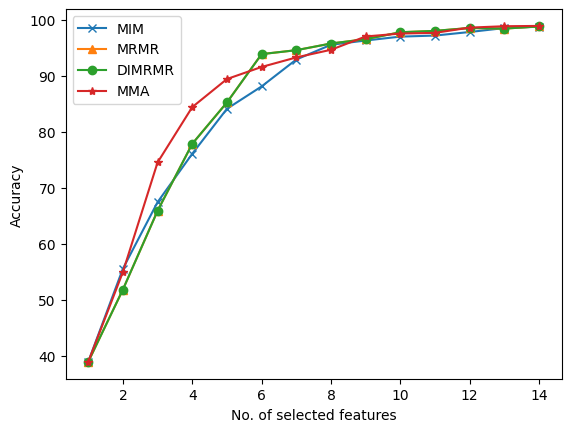

In [40]:
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt

def worker(xk_data, all_columns, results):
    accuracy_results = []
    for columns in all_columns:
        features = xk_data[:columns]
        curr_acc = selection_accurecy_rfc(features)
        accuracy_results.append(curr_acc)
    return accuracy_results

all_columns = [x for x in range(1, 15)]
print(all_columns)

with multiprocessing.Pool() as pool:
    mim_results = pool.apply_async(worker, args=(xk_mim, all_columns, []))
    mrmr_results = pool.apply_async(worker, args=(xk_mrmr, all_columns, []))
    dimrmr_results = pool.apply_async(worker, args=(xk_dimrmr, all_columns, []))
    mma_results = pool.apply_async(worker, args=(xk_mma, all_columns, []))

    mim_accuracy_results = mim_results.get()
    mrmr_accuracy_results = mrmr_results.get()
    dimrmr_accuracy_results = dimrmr_results.get()
    mma_accuracy_results = mma_results.get()

xpoints = np.array(all_columns)

plt.plot(xpoints, mim_accuracy_results, marker='x', label='MIM')
plt.plot(xpoints, mrmr_accuracy_results, marker='^', label='MRMR')
plt.plot(xpoints, dimrmr_accuracy_results, marker='o', label='DIMRMR')
plt.plot(xpoints, mma_accuracy_results, marker='*', label='MMA')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [41]:
######################## MMA DIMRMR ########################
print('MMA DIMRMR')
xk_dimrmrM = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)
 
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
 
while len(xk_dimrmrM) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)
 
 
    for i in range(length - 1):
        if (i in xk_dimrmrM):
            continue
 
        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c fk )
 
        ifkxk = 0 #1/f x I (fk  xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmrM)):
            ifkxk += get_mutual_info(i, xk_dimrmrM[j])
 
        if (len(xk_dimrmrM)):
            ifkxk = ifkxk / len(xk_dimrmrM)
 
        mrmr[i] = icfk - ifkxk  #calculation done for MRMR
 
        #DIMRMRicfk
        avg_dep = 0
        iFcfk = 0
        # print(feature_list[i])
 
        for j in range(len(xk_dimrmrM)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmrM[j])
            iFcfk += (conditional_mutual_info(xk_dimrmrM[j], length - 1, i) - get_mutual_info(xk_dimrmrM[j], length - 1))
        if (len(xk_dimrmrM)):
            avg_dep = avg_dep / len(xk_dimrmrM)
            iFcfk = iFcfk / len(xk_dimrmrM)
 
        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized
 
        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
 
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmrM) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]
 
 
    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)
 
    xk_dimrmrM.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]
 
 
print("MMA DIMRMR features serially")
print(xk_dimrmrM)
print('-----------------------------------')

MMA DIMRMR
max value 1.2488411500525327 for feature 13, DI value: 1, C ratio: -1.2488411500525327
max value 0.2521026008648631 for feature 15, DI value: -0.7273983152780928, C ratio: -0.38147325815218025
max value 0.08929750307432001 for feature 1, DI value: 0.6207507325871137, C ratio: 0.29950795727353796
max value 0.08339714333580854 for feature 4, DI value: 1.159808355340167, C ratio: 0.5477334390210631
max value 0.06682822383153085 for feature 7, DI value: 0.8004216902399796, C ratio: 0.3844091674706773
max value 0.044030526066589935 for feature 14, DI value: 0.8646881992065573, C ratio: 0.41094863563722317
max value -0.06644267920761623 for feature 3, DI value: 0.7235773140453073, C ratio: 0.3465696007544359
max value -0.03780825976712575 for feature 9, DI value: 1.2620009078380459, C ratio: 0.5927583587204066
max value -0.04010976618298138 for feature 0, DI value: 1.4594115412899975, C ratio: 0.6783529316830057
max value -0.10932994214476338 for feature 10, DI value: 1.4803423146

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


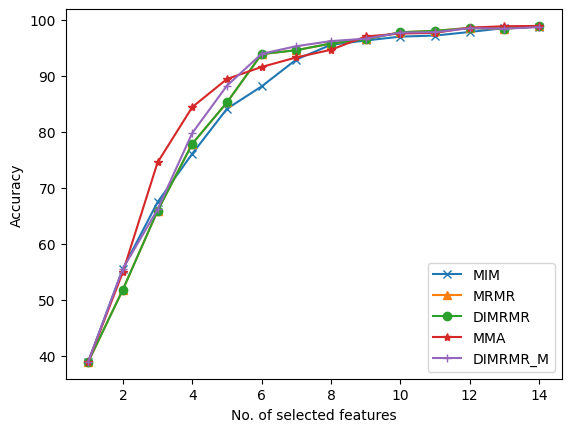

In [45]:
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt

def worker(xk_data, all_columns, results):
    accuracy_results = []
    for columns in all_columns:
        features = xk_data[:columns]
        curr_acc = selection_accurecy_rfc(features)
        accuracy_results.append(curr_acc)
    return accuracy_results

all_columns = [x for x in range(1, 15)]
print(all_columns)

with multiprocessing.Pool() as pool:
    mim_results = pool.apply_async(worker, args=(xk_mim, all_columns, []))
    mrmr_results = pool.apply_async(worker, args=(xk_mrmr, all_columns, []))
    dimrmr_results = pool.apply_async(worker, args=(xk_dimrmr, all_columns, []))
    mma_results = pool.apply_async(worker, args=(xk_mma, all_columns, []))
    dimrmrM_results = pool.apply_async(worker, args=(xk_dimrmrM, all_columns, []))

    mim_accuracy_results = mim_results.get()
    mrmr_accuracy_results = mrmr_results.get()
    dimrmr_accuracy_results = dimrmr_results.get()
    mma_accuracy_results = mma_results.get()
    dimrmrM_accuracy_results = dimrmrM_results.get()

xpoints = np.array(all_columns)

plt.plot(xpoints, mim_accuracy_results, marker='x', label='MIM')
plt.plot(xpoints, mrmr_accuracy_results, marker='^', label='MRMR')
plt.plot(xpoints, dimrmr_accuracy_results, marker='o', label='DIMRMR')
plt.plot(xpoints, mma_accuracy_results, marker='*', label='MMA')
plt.plot(xpoints, dimrmrM_accuracy_results, marker='+', label='DIMRMR_M')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# dimrmr mod
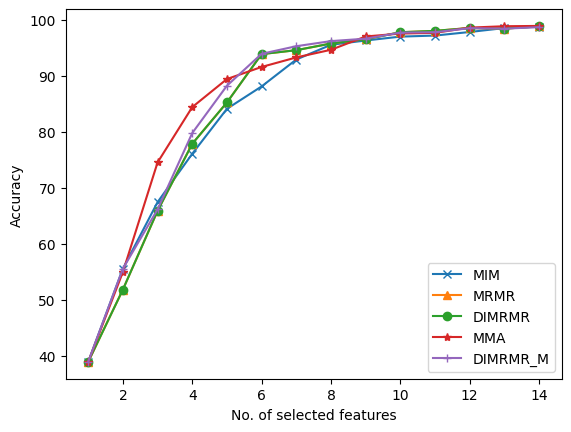

In [46]:
######################## MMA DIMRMR ########################
print('MMA DIMRMR')
xk_dimrmrM = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)
 
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
 
while len(xk_dimrmrM) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)
 
 
    for i in range(length - 1):
        if (i in xk_dimrmrM):
            continue
 
        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c fk )
 
        ifkxk = 0 #1/f x I (fk  xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmrM)):
            ifkxk += get_mutual_info(i, xk_dimrmrM[j])
 
        if (len(xk_dimrmrM)):
            ifkxk = ifkxk / len(xk_dimrmrM)
 
        mrmr[i] = icfk - ifkxk  #calculation done for MRMR
 
        #DIMRMRicfk
        avg_dep = 0
        iFcfk = 0
        # print(feature_list[i])
 
        for j in range(len(xk_dimrmrM)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmrM[j])
            iFcfk += (conditional_mutual_info(xk_dimrmrM[j], length - 1, i) - get_mutual_info(xk_dimrmrM[j], i))
        if (len(xk_dimrmrM)):
            avg_dep = avg_dep / len(xk_dimrmrM)
            iFcfk = iFcfk / len(xk_dimrmrM)
 
        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized
 
        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
 
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmrM) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]
 
 
    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)
 
    xk_dimrmrM.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]
 
 
print("MMA DIMRMR features serially")
print(xk_dimrmrM)
print('-----------------------------------')

MMA DIMRMR
max value 1.2488411500525327 for feature 13, DI value: 1, C ratio: -1.2488411500525327
max value 0.45617808818666855 for feature 15, DI value: -1.3162227270778308, C ratio: -0.38147325815218025
max value 0.2841386113135387 for feature 1, DI value: 1.9751868199760119, C ratio: 0.29950795727353796
max value 0.14887607088121924 for feature 14, DI value: 1.5253424543513507, C ratio: 0.3599508211791236
max value 0.0695929332078463 for feature 4, DI value: 1.6196544770511987, C ratio: 0.5219539200270775
max value 0.10949730441124993 for feature 7, DI value: 0.8858024488615772, C ratio: 0.4135824042972669
max value -0.08496710150908486 for feature 5, DI value: 0.7106465795344348, C ratio: 0.4002130488486195
max value -0.10343181857377498 for feature 9, DI value: 1.3173792258013188, C ratio: 0.5856370803317816
max value -0.12252644346568317 for feature 0, DI value: 1.886070154290916, C ratio: 0.6879560796196178
max value -0.1307909956623467 for feature 3, DI value: 1.106751239351462

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


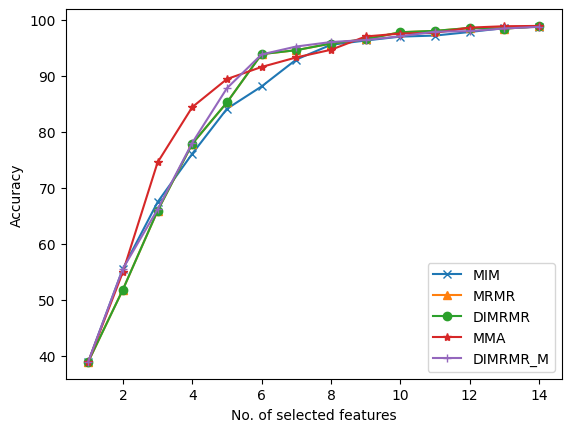

In [47]:
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt

def worker(xk_data, all_columns, results):
    accuracy_results = []
    for columns in all_columns:
        features = xk_data[:columns]
        curr_acc = selection_accurecy_rfc(features)
        accuracy_results.append(curr_acc)
    return accuracy_results

all_columns = [x for x in range(1, 15)]
print(all_columns)

with multiprocessing.Pool() as pool:
    # mim_results = pool.apply_async(worker, args=(xk_mim, all_columns, []))
    # mrmr_results = pool.apply_async(worker, args=(xk_mrmr, all_columns, []))
    # dimrmr_results = pool.apply_async(worker, args=(xk_dimrmr, all_columns, []))
    # mma_results = pool.apply_async(worker, args=(xk_mma, all_columns, []))
    dimrmrM_results = pool.apply_async(worker, args=(xk_dimrmrM, all_columns, []))

    # mim_accuracy_results = mim_results.get()
    # mrmr_accuracy_results = mrmr_results.get()
    # dimrmr_accuracy_results = dimrmr_results.get()
    # mma_accuracy_results = mma_results.get()
    dimrmrM_accuracy_results = dimrmrM_results.get()

xpoints = np.array(all_columns)

plt.plot(xpoints, mim_accuracy_results, marker='x', label='MIM')
plt.plot(xpoints, mrmr_accuracy_results, marker='^', label='MRMR')
plt.plot(xpoints, dimrmr_accuracy_results, marker='o', label='DIMRMR')
plt.plot(xpoints, mma_accuracy_results, marker='*', label='MMA')
plt.plot(xpoints, dimrmrM_accuracy_results, marker='+', label='DIMRMR_M')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# mistaken mod of dimrmr
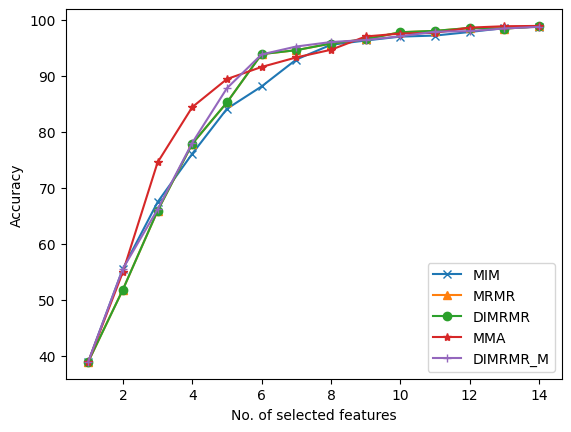
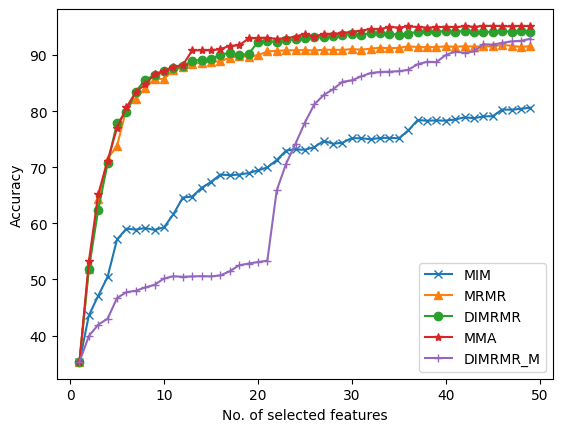